Run `pip install -r requirements.txt` this is used to install all required libraries like pandas, etc.


Load CSV Data using Pandas

In [18]:
import pandas as pd

# Load the CSV data into a pandas DataFrame
file_path = './data/bom.movie_gross.csv'
csv_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(csv_df.head())

# Ensure numeric columns are of correct type
csv_df['domestic_gross'] = pd.to_numeric(csv_df['domestic_gross'], errors='coerce')
csv_df['foreign_gross'] = pd.to_numeric(csv_df['foreign_gross'], errors='coerce')

# Check for missing values
print(csv_df.isnull().sum())

# Fill or drop missing values as appropriate (here we will drop them)
csv_df.dropna(subset=['domestic_gross', 'foreign_gross'], inplace=True)

# Check the data types
print(csv_df.dtypes)

# Convert 'year' to integer if necessary
csv_df['year'] = csv_df['year'].astype(int)

# Display basic statistics
print(csv_df.describe())


                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64
title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object
       domestic_gross  foreign_gross         year
count    2.004000e+03   2.004000e+03  2004.000000
mean     4.566975e+07   7.590713e+07  2013.49

Load SQLite Data using Pandas

In [11]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('./data/im.db')

# Load SQLite data into a DataFrame
sqlite_query = '''
    SELECT mb.movie_id, mb.primary_title, mb.genres, mb.start_year, mr.averagerating, mr.numvotes
    FROM movie_basics mb
    JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
'''
sqlite_df = pd.read_sql_query(sqlite_query, conn)

# Close the connection
conn.close()

print(sqlite_df.head())


    movie_id                    primary_title                genres  \
0  tt0063540                        Sunghursh    Action,Crime,Drama   
1  tt0066787  One Day Before the Rainy Season       Biography,Drama   
2  tt0069049       The Other Side of the Wind                 Drama   
3  tt0069204                  Sabse Bada Sukh          Comedy,Drama   
4  tt0100275         The Wandering Soap Opera  Comedy,Drama,Fantasy   

   start_year  averagerating  numvotes  
0        2013            7.0        77  
1        2019            7.2        43  
2        2018            6.9      4517  
3        2018            6.1        13  
4        2017            6.5       119  


Analyze Data to Determine Top Performing Film Types

In [12]:
# Analyze genres in SQLite data
sqlite_genres = sqlite_df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
sqlite_df_genres = sqlite_df[['primary_title', 'averagerating', 'numvotes']].join(sqlite_genres.rename('genre'))

# Aggregate data by genre
genre_rating_summary = sqlite_df_genres.groupby('genre').agg({
    'averagerating': 'mean',
    'numvotes': 'sum'
}).reset_index()

print(genre_rating_summary)

# Analyze genres in CSV data
csv_genres = csv_df['title'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
csv_df_genres = csv_df[['title', 'domestic_gross', 'foreign_gross']].join(csv_genres.rename('genre'))

# Aggregate data by genre
genre_gross_summary = csv_df_genres.groupby('genre').agg({
    'domestic_gross': 'sum',
    'foreign_gross': 'sum'
}).reset_index()

print(genre_gross_summary)



          genre  averagerating   numvotes
0        Action       5.810361  101161682
1         Adult       3.766667        164
2     Adventure       6.196201   84232589
3     Animation       6.248308   15353302
4     Biography       7.162274   21609446
5        Comedy       6.002689   74305805
6         Crime       6.115441   39631356
7   Documentary       7.332090    4739345
8         Drama       6.401559  119567500
9        Family       6.394725    8636710
10      Fantasy       5.919473   26335704
11    Game-Show       7.300000       3469
12      History       7.040956    7843349
13       Horror       5.003440   23884695
14        Music       7.091972    5453369
15      Musical       6.498336    1387965
16      Mystery       5.920401   24657286
17         News       7.271330     123319
18   Reality-TV       6.500000        459
19      Romance       6.146608   26913873
20       Sci-Fi       5.489755   42960289
21        Short       8.800000          8
22        Sport       6.961493    

Create Visualizations to Present Findings

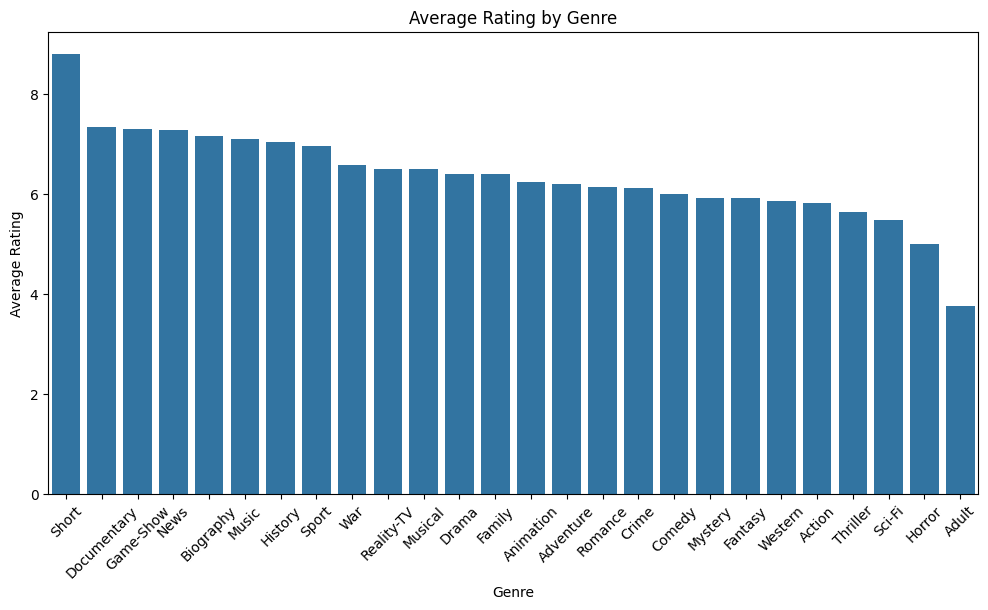

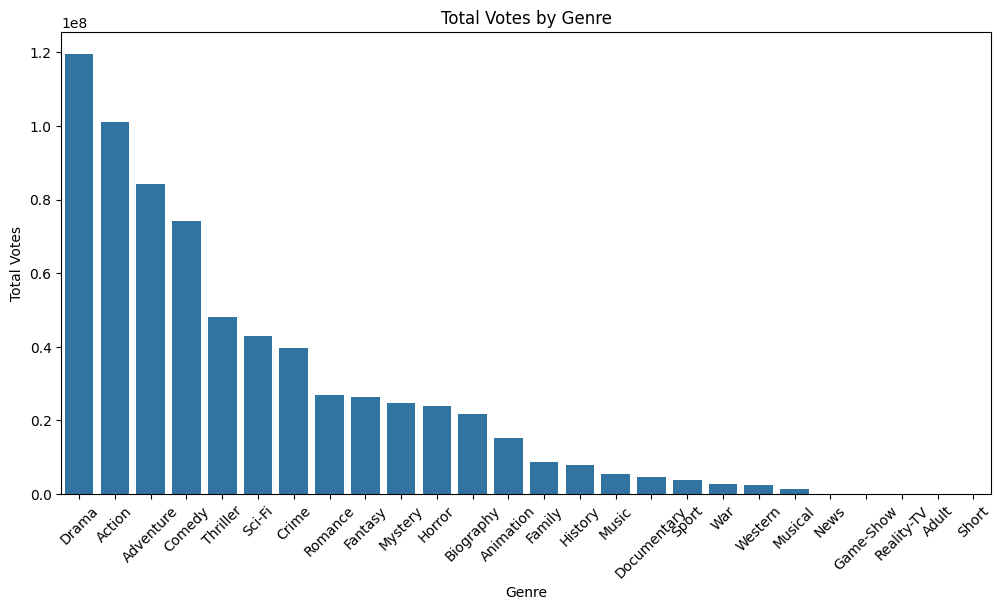

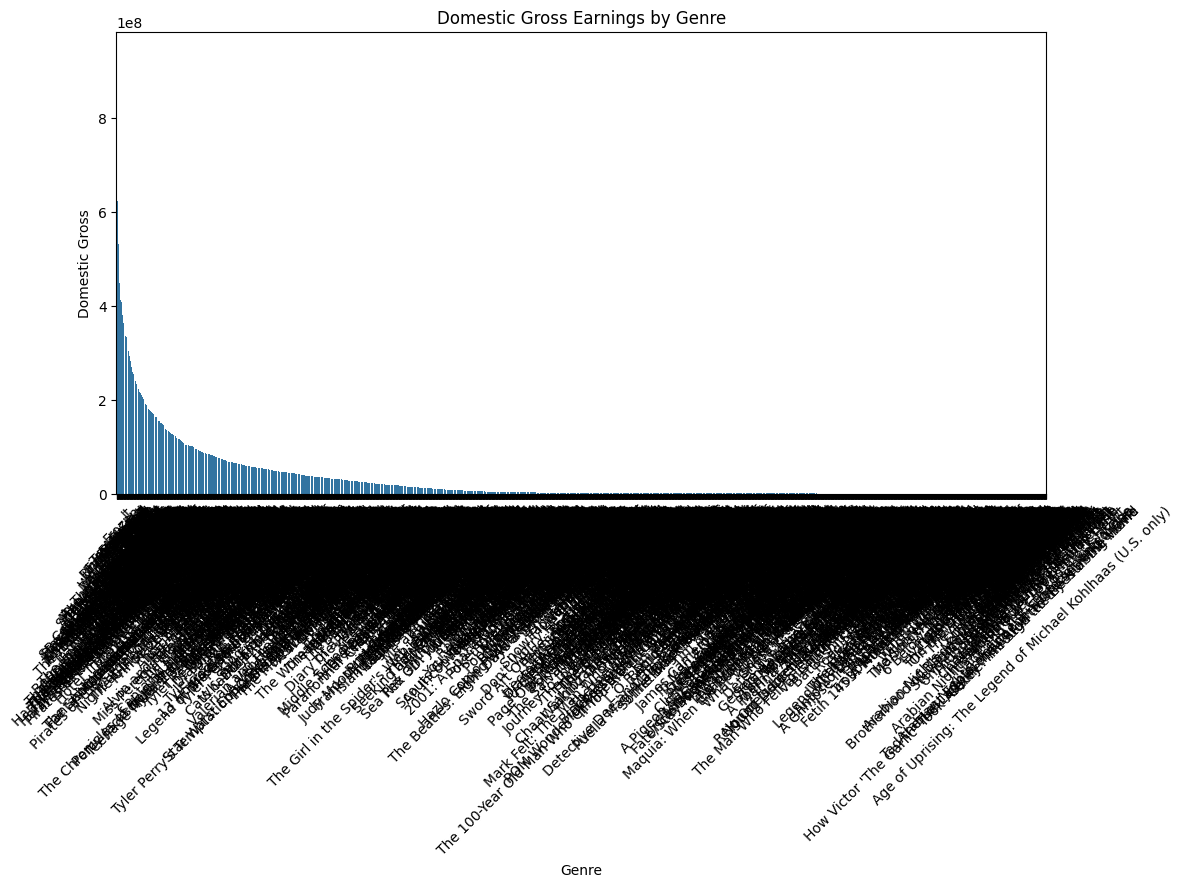

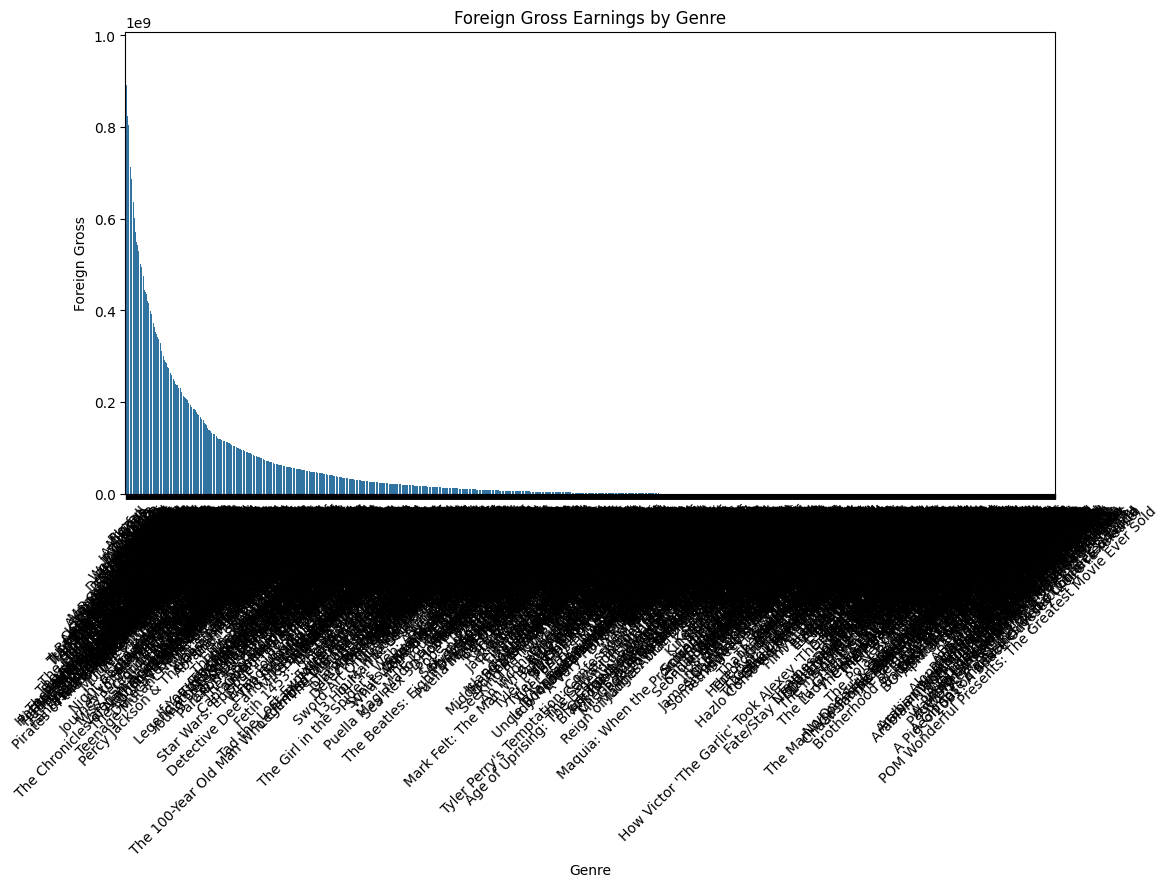

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Average Rating by Genre
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='averagerating', data=genre_rating_summary.sort_values(by='averagerating', ascending=False))
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Total Votes by Genre
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='numvotes', data=genre_rating_summary.sort_values(by='numvotes', ascending=False))
plt.title('Total Votes by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()

# Visualization 3: Gross Earnings by Genre
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='domestic_gross', data=genre_gross_summary.sort_values(by='domestic_gross', ascending=False))
plt.title('Domestic Gross Earnings by Genre')
plt.xlabel('Genre')
plt.ylabel('Domestic Gross')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='foreign_gross', data=genre_gross_summary.sort_values(by='foreign_gross', ascending=False))
plt.title('Foreign Gross Earnings by Genre')
plt.xlabel('Genre')
plt.ylabel('Foreign Gross')
plt.xticks(rotation=45)
plt.show()


In [9]:

# Actionable Insights:
print("Top Rated Genres:\n", genre_rating_summary.sort_values(by='averagerating', ascending=False).head())
print("Most Popular Genres:\n", genre_rating_summary.sort_values(by='numvotes', ascending=False).head())
print("High Earning Genres:\n", genre_gross_summary.sort_values(by='domestic_gross', ascending=False).head())
print("High Earning Genres (Foreign):\n", genre_gross_summary.sort_values(by='foreign_gross', ascending=False).head())

Top Rated Genres:
           genre  averagerating  numvotes
21        Short       8.800000         8
7   Documentary       7.332090   4739345
11    Game-Show       7.300000      3469
17         News       7.271330    123319
4     Biography       7.162274  21609446
Most Popular Genres:
         genre  averagerating   numvotes
8       Drama       6.401559  119567500
0      Action       5.810361  101161682
2   Adventure       6.196201   84232589
5      Comedy       6.002689   74305805
23   Thriller       5.639114   48155313
High Earning Genres:
                              genre  domestic_gross foreign_gross
2371  Star Wars: The Force Awakens     936700000.0       1,131.6
450                  Black Panther     700100000.0     646900000
338         Avengers: Infinity War     678800000.0       1,369.5
1398                Jurassic World     652300000.0       1,019.4
1680         Marvel's The Avengers     623400000.0     895500000


TypeError: '<' not supported between instances of 'int' and 'str'